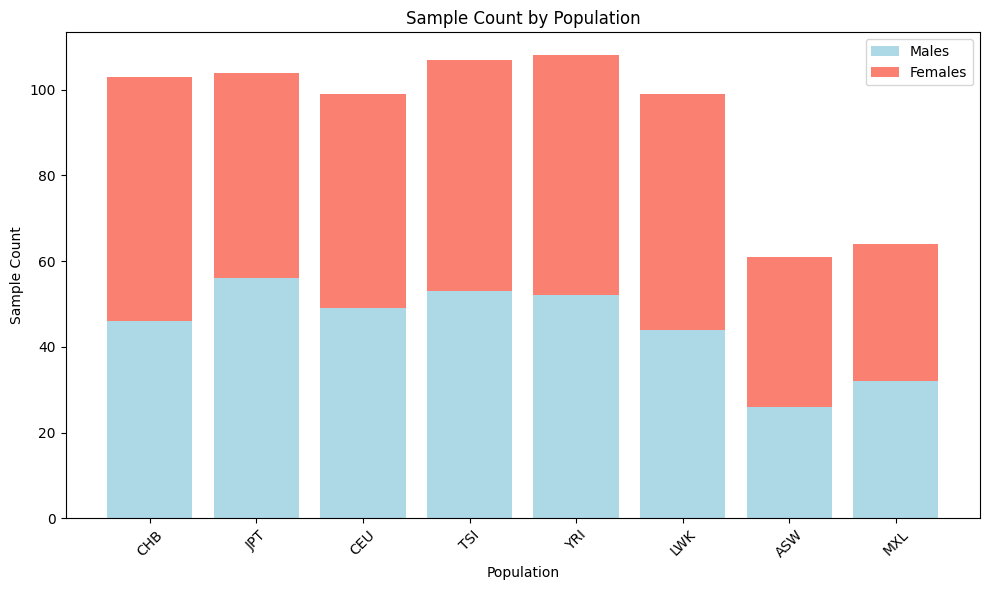

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

# Data for populations with sample counts
data_filtered = {
    "Population": ["CHB", "JPT", "CEU", "TSI", "YRI", "LWK", "ASW", "MXL"],
    "Sample_Count": [103, 104, 99, 107, 108, 99, 61, 64],
    "Super_Population": ["EAS", "EAS", "EUR", "EUR", "AFR", "AFR", "AFR", "AMR"],
    "Males": [46, 56, 49, 53, 52, 44, 26, 32],
    "Females": [57, 48, 50, 54, 56, 55, 35, 32]
}

# Convert to DataFrame
df_filtered = pd.DataFrame(data_filtered)

# Plotting the data
fig, ax = plt.subplots(figsize=(10, 6))

# Plot stacked bar chart for Male and Female counts
ax.bar(df_filtered["Population"], df_filtered["Males"], color="lightblue", label="Males")
ax.bar(df_filtered["Population"], df_filtered["Females"], bottom=df_filtered["Males"], color="salmon", label="Females")

# Labeling
ax.set_xlabel("Population")
ax.set_ylabel("Sample Count")
ax.set_title("Sample Count by Population")
ax.legend()

# Display the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


   Population  Sample_Count Super_Population  Males  Females
0         ASW            49              AFR     19       30
1         CEU           112              EUR     57       55
2         CHB            84              EAS     42       42
3         CHD            85          Unknown     41       44
4         GIH            88          Unknown     45       43
5     HapMap3           988          Unknown    488      500
6         JPT            86              EAS     44       42
7         LWK            90              AFR     45       45
8         MKK           143          Unknown     70       73
9         MXL            50              AMR     25       25
10        TSI            88              EUR     44       44
11        YRI           113              AFR     56       57


C:\Users\mercu\AppData\Local\Temp\ipykernel_31536\2262956186.py:28: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(file_path, delim_whitespace=True, header=None, names=['individual_id', 'gender', 'population'])
C:\Users\mercu\AppData\Local\Temp\ipykernel_31536\2262956186.py:28: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(file_path, delim_whitespace=True, header=None, names=['individual_id', 'gender', 'population'])
C:\Users\mercu\AppData\Local\Temp\ipykernel_31536\2262956186.py:28: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(file_path, delim_whitespace=True, header=None, names=['individual_id', 'gender', 'population'])
C:\Users\mercu\AppD

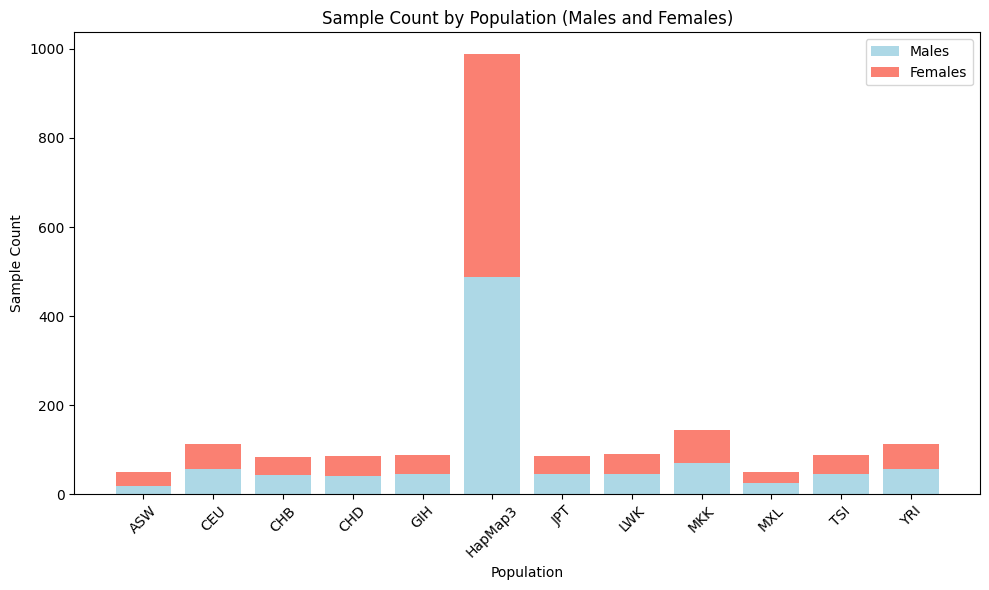

In [9]:
import os
import pandas as pd

# Set the directory path containing the .ind files
directory_path = 'C:/Users/mercu/Desktop/ipys/704HW1/02704_data'  # Replace with your actual path

# Initialize lists to store information
populations = []
sample_counts = []
super_populations = []
males = []
females = []

# Define a mapping for super populations if available, else use placeholders
super_population_map = {
    'ASW': 'AFR', 'MXL': 'AMR', 'CHB': 'EAS', 'JPT': 'EAS', 
    'CEU': 'EUR', 'TSI': 'EUR', 'YRI': 'AFR', 'LWK': 'AFR'
    # Add additional mappings if necessary
}

# Process each .ind file
for filename in os.listdir(directory_path):
    if filename.endswith('.ind'):
        pop_name = filename.split('.')[0]  # Extract population name from file
        file_path = os.path.join(directory_path, filename)
        
        # Read the .ind file assuming it has columns: individual_id, gender, population
        data = pd.read_csv(file_path, delim_whitespace=True, header=None, names=['individual_id', 'gender', 'population'])
        #print(data.head())
        # Calculate counts
        total_samples = len(data)
        male_count = (data['gender'] == 'M').sum()  # Assuming 1 represents males
        female_count = (data['gender'] == 'F').sum()  # Assuming 2 represents females
        
        # Append data to lists
        populations.append(pop_name)
        sample_counts.append(total_samples)
        super_populations.append(super_population_map.get(pop_name, 'Unknown'))
        males.append(male_count)
        females.append(female_count)

# Create a summary DataFrame
summary_df = pd.DataFrame({
    'Population': populations,
    'Sample_Count': sample_counts,
    'Super_Population': super_populations,
    'Males': males,
    'Females': females
})

# Display the summary
print(summary_df)

# Plotting the data
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(summary_df['Population'], summary_df['Males'], color="lightblue", label="Males")
ax.bar(summary_df['Population'], summary_df['Females'], bottom=summary_df['Males'], color="salmon", label="Females")
ax.set_xlabel("Population")
ax.set_ylabel("Sample Count")
ax.set_title("Sample Count by Population (Males and Females)")
ax.legend()

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


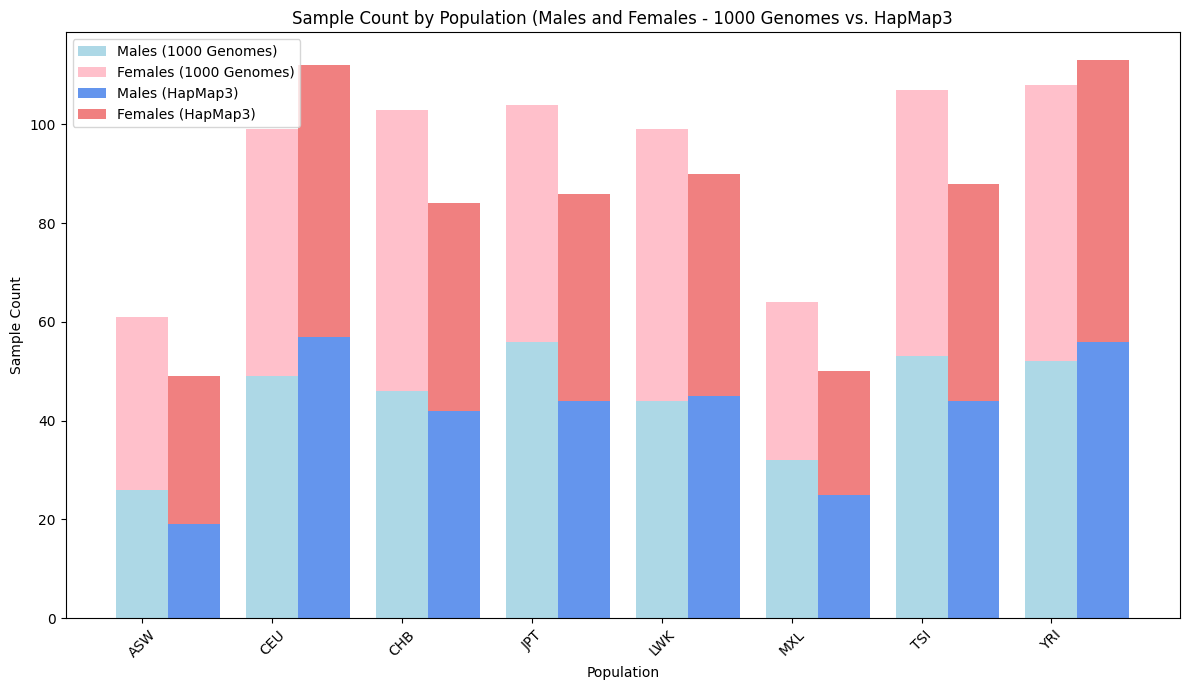

In [16]:
# Filtering for mutual populations between 1000 Genomes and HapMap3
mutual_populations = set(summary_df["Population"]).intersection(set(hapmap3_df["Population"]))

# Filter both DataFrames to keep only mutual populations
df_1000_genomes_mutual = summary_df[summary_df["Population"].isin(mutual_populations)]
df_hapmap3_mutual = hapmap3_df[hapmap3_df["Population"].isin(mutual_populations)]

# Plotting the comparison in a combined chart for mutual populations
fig, ax = plt.subplots(figsize=(12, 7))

# Plot 1000 Genomes data with distinct colors for Males and Females
ax.bar(df_1000_genomes_mutual["Population"], df_1000_genomes_mutual["Males"], color="lightblue", label="Males (1000 Genomes)", width=0.4, align='center')
ax.bar(df_1000_genomes_mutual["Population"], df_1000_genomes_mutual["Females"], bottom=df_1000_genomes_mutual["Males"], color="pink", label="Females (1000 Genomes)", width=0.4, align='center')

# Offset for HapMap3 data
offset = 0.4  # Offset the second dataset slightly to avoid overlap

# Plot HapMap3 data with different colors for Males and Females
ax.bar([x + offset for x in range(len(df_hapmap3_mutual))], df_hapmap3_mutual["Males"], color="cornflowerblue", label="Males (HapMap3)", width=0.4, align='center')
ax.bar([x + offset for x in range(len(df_hapmap3_mutual))], df_hapmap3_mutual["Females"], bottom=df_hapmap3_mutual["Males"], color="lightcoral", label="Females (HapMap3)", width=0.4, align='center')

# Labeling
ax.set_xlabel("Population")
ax.set_ylabel("Sample Count")
ax.set_title("Sample Count by Population (Males and Females - 1000 Genomes (p3) vs. HapMap3")
ax.legend()

# Display the plot with x-tick adjustments
plt.xticks(range(len(df_hapmap3_mutual)), df_hapmap3_mutual["Population"], rotation=45)
plt.tight_layout()
plt.show()
